<a href="https://colab.research.google.com/github/vincent0965/Colab_note/blob/master/fashion_mnist_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((train picture, train ans.), (test picture, tesyt ans.))
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
trans = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
label = trans

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


T-shirt/top


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,1,0,0,3,0,0,0,113,49,0,0,0,0,51,114,0,0,0,3,0,1,0,0,0,0
1,0,0,0,0,1,0,0,28,146,187,193,240,202,169,173,216,246,200,182,136,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,135,201,201,190,178,170,217,247,255,221,182,177,185,203,184,65,0,0,0,0,0,0
3,0,0,0,7,0,93,203,174,174,175,182,171,167,167,169,173,168,171,176,171,178,201,35,0,3,0,0,0
4,0,0,0,0,0,166,182,167,174,176,180,177,176,178,174,171,183,182,176,176,163,184,128,0,1,0,0,0
5,0,0,0,0,61,191,184,170,168,168,168,171,168,171,174,163,194,219,181,171,167,184,182,7,0,0,0,0
6,0,0,0,0,132,189,187,188,161,174,167,161,161,167,159,162,161,152,160,168,174,184,190,84,0,0,0,0
7,0,0,0,0,178,183,180,205,166,184,170,161,163,163,162,160,167,167,175,160,189,177,187,145,0,0,0,0
8,0,0,0,0,211,171,175,215,163,187,169,164,161,163,164,159,162,164,171,167,195,178,181,183,0,0,0,0
9,0,0,0,39,177,166,170,204,174,195,162,164,157,159,157,162,159,162,170,176,194,178,178,170,24,0,0,0


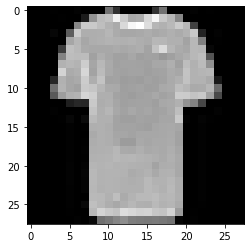

In [4]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
print(trans[y_train[idx]])
pd.DataFrame(x_train[idx])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Dropout => Avoid follow only one feature
layers = [
          # 28 * 28 = 784
          # 784 * 128 +128 = 100480
          Dense(512, activation="relu", input_dim = 784),
          # 128 * 10 = 1280 , 1280+10(bias)=1290
          Dropout(0.25),
          Dense(10, activation="softmax")

]
model = Sequential(layers)
# param => layer 1 to layer 2 in all link and add bias number of layer 2
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
# x:scaling 0-255 => 0-1 farme is random
# y:one-hot encoding 10 Ans.
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
# x_train_norm[0]

In [7]:
# binary cross entropy: p*log(1/q) + (1-p)*log(1/(1-q))
# categorical cross entropy: p1 * log(1/q1) + ...
# SparseCategoricalCrossentropy => not zero position, save memory
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

In [8]:
# batch: 100~200(small picture) 10~20(large picture)
# epoch: how many adjustment with data
# 60000data, 2epoch, 200batch =>60000*2/200 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
      ModelCheckpoint("model.h5", save_best_only=True),
      EarlyStopping(patience=4, restore_best_weights=True)
      ]

model.fit(x_train_norm, y_train, batch_size=100, epochs=50, validation_split=0.1, callbacks = callbacks, verbose=2)
# validation_split=
# verbose => cancel bar figure

Epoch 1/50
540/540 - 4s - loss: 0.5307 - accuracy: 0.8144 - val_loss: 0.3977 - val_accuracy: 0.8522
Epoch 2/50
540/540 - 3s - loss: 0.3939 - accuracy: 0.8575 - val_loss: 0.3521 - val_accuracy: 0.8737
Epoch 3/50
540/540 - 3s - loss: 0.3569 - accuracy: 0.8702 - val_loss: 0.3634 - val_accuracy: 0.8678
Epoch 4/50
540/540 - 3s - loss: 0.3354 - accuracy: 0.8771 - val_loss: 0.3257 - val_accuracy: 0.8807
Epoch 5/50
540/540 - 3s - loss: 0.3154 - accuracy: 0.8846 - val_loss: 0.3215 - val_accuracy: 0.8852
Epoch 6/50
540/540 - 3s - loss: 0.3070 - accuracy: 0.8867 - val_loss: 0.3261 - val_accuracy: 0.8805
Epoch 7/50
540/540 - 3s - loss: 0.2931 - accuracy: 0.8917 - val_loss: 0.3194 - val_accuracy: 0.8858
Epoch 8/50
540/540 - 3s - loss: 0.2804 - accuracy: 0.8963 - val_loss: 0.3157 - val_accuracy: 0.8818
Epoch 9/50
540/540 - 3s - loss: 0.2764 - accuracy: 0.8970 - val_loss: 0.3494 - val_accuracy: 0.8717
Epoch 10/50
540/540 - 3s - loss: 0.2682 - accuracy: 0.8985 - val_loss: 0.3218 - val_accuracy: 0.8857

540/540 - 
=> batch_size=100 => 60000/100 = 600；validation_split=0.1 => 600 * 0.1 = 60(keep data), train 540 data
1s - 
loss: 0.1611 - full down
accuracy: 0.9535 - full up(correct rate)
val_loss: 0.1187 - (loss function)
=> use ModelCheckpoint & EarlyStopping function model 
val_accuracy: 0.9668 
<tensorflow.python.keras.callbacks.History at 0x7f1d75828f60>

In [9]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.8873


[0.321682333946228, 0.8873000144958496]

In [10]:
# 手動儲存: model.save("model.h5")
# if not os.path.exists("model.h5"):
#     newmodel/compile
# else:
#   load_model("model.h5")
from tensorflow.keras.models import load_model
load = load_model("model.h5")
# not compile, still fit
load.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.1025


[0.321682333946228, 0.10249999910593033]

In [11]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
    mat, 
    index=["{}(正確)".format(n) for n in label],
    columns=["{}(預測)".format(n) for n in label]
    )

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(正確),848,1,21,12,5,1,100,0,12,0
Trouser(正確),2,974,0,18,3,0,2,0,1,0
Pullover(正確),18,2,818,8,100,0,51,0,3,0
Dress(正確),25,9,13,884,37,0,24,0,8,0
Coat(正確),0,0,93,24,828,0,53,0,2,0
Sandal(正確),0,0,0,0,0,948,0,35,1,16
Shirt(正確),126,0,103,25,61,0,669,0,16,0
Sneaker(正確),0,0,0,0,0,6,0,983,1,10
Bag(正確),6,0,4,2,3,1,1,4,979,0
Ankle boot(正確),0,0,0,0,0,4,1,53,0,942


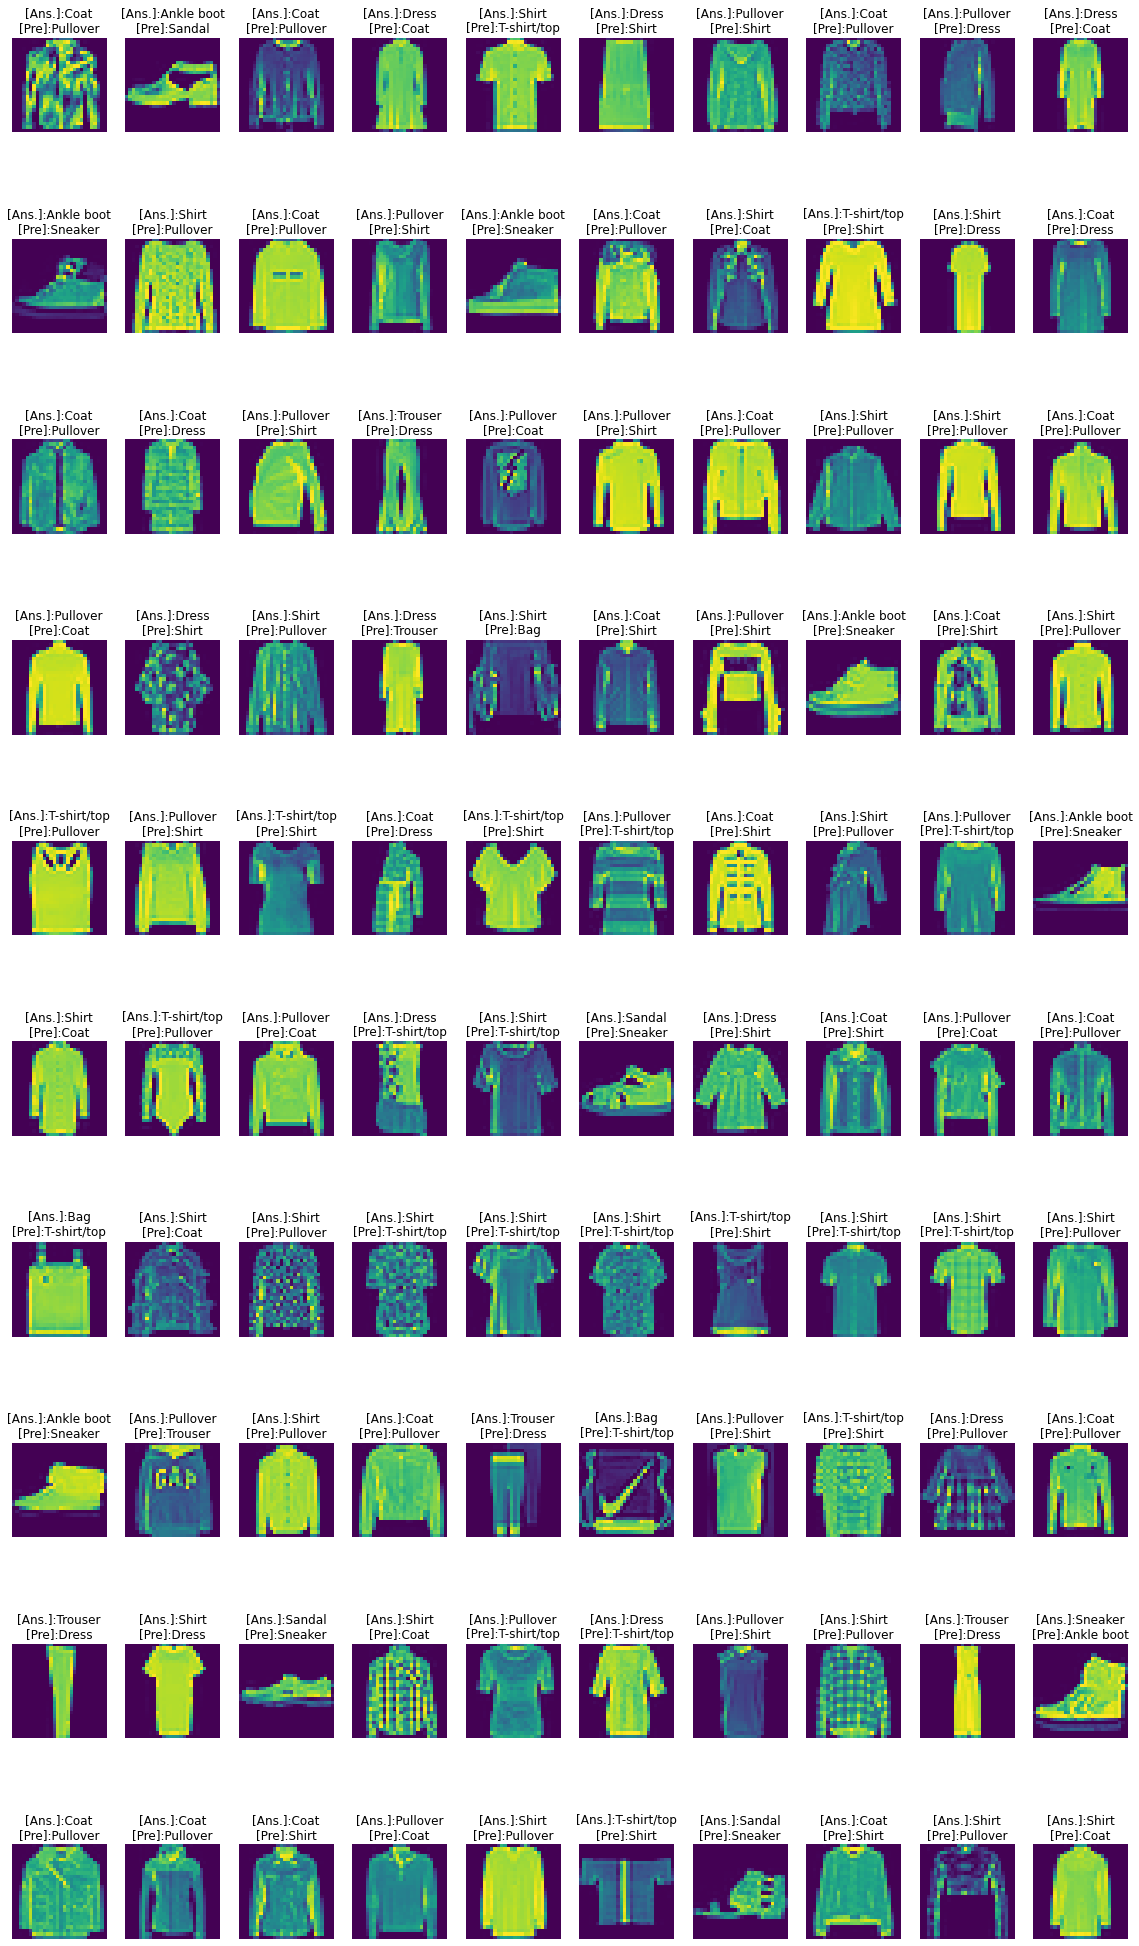

In [12]:
# subplot(total height, total weight, ith)
import numpy as np
idx = np.nonzero(pre != y_test)[0]
idx = idx[:100]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(20, 40))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[Ans.]:{}\n[Pre]:{}".format(label[false_label[i]], label[false_pre[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

檔名85.jpg
T-shirt/top 的機率是: 0.0
Trouser 的機率是: 0.0
Pullover 的機率是: 0.0
Dress 的機率是: 0.0
Coat 的機率是: 0.0
Sandal 的機率是: 0.0
Shirt 的機率是: 0.0
Sneaker 的機率是: 0.0
Bag 的機率是: 1.0
Ankle boot 的機率是: 0.0


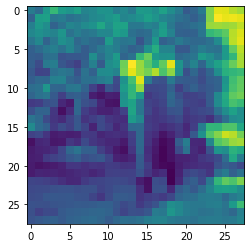

In [17]:
# pip install pillow
import PIL
fn = input("檔名")
img = PIL.Image.open(fn).convert("L").resize((28, 28))
img_np = np.array(img)
test = img_np.reshape(1, 784) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(label[i], "的機率是:", round(p, 3))
plt.imshow(img_np)